In [ ]:
# このノートは自然言語処理100本ノックの学習用です。
# https://nlp100.github.io/ja/

## **第1章: 準備運動**

In [ ]:
# 00. 文字列の逆順
txt = 'stressed'
print(txt[::-1])

# [start:stop:step]はstart,stopが省略されると
# 0~len(txt)までとなるが、どちらか一方省略することは
# できない

In [ ]:
# 01. 「パタトクカシーー」
txt = 'パタトクカシーー'
print(txt[::2])

In [ ]:
# 02. 「パトカー」＋「タクシー」＝「パタトクカシーー」
txt1 = 'パトカー'
txt2 = 'タクシー'
ans = ''
for txt in zip(txt1,txt2):
    ans += ''.join(txt)
print(ans)

In [ ]:
# 03. 円周率
text = 'Now I need a drink, alcoholic of course, \
        after the heavy lectures \
        involving quantum mechanics.'
text = text.replace(",","").replace(".","")
ans = [len(x) for x in text.split()]
print(ans)

In [ ]:
# 04. 元素記号
text = 'Hi He Lied Because Boron Could Not \
    Oxidize Fluorine. New Nations Might Also \
    Sign Peace Security Clause. Arthur King Can.'
ans = {}
# enumerate(xxx,1)でindexを1からに設定
for i,x in enumerate(text.split(),1):
    if i in [1,5,6,7,8,9,15,16,19]:
        ans[x[0]] = i
    else:
        ans[x[:2]] = i

print(ans)

In [ ]:
# 05. n-gram
# (参考)https://en.wikipedia.org/wiki/N-gram
def ngram(num,arr):
    return [arr[i:i+num] for i in range(len(arr)-num+1)]

text = 'I am an NLPer'
print(ngram(2,text.split()))
print(ngram(2,text.replace(' ','')))

In [ ]:
# 06. 集合
# setでは和集合、差集合、積集合を簡単に出力できる
X = ngram(2,'paraparaparadise')
Y = ngram(2,'paragraph')
print(f'X:{X}')
print(f'Y:{Y}')
print(f'和集合：{set(X) | set(Y)}')
print(f'積集合：{set(X) & set(Y)}')
print(f'差集合X-Y:{set(X)-set(Y)}')
print(f'差集合Y-X:{set(Y)-set(X)}')
print(f'se in X:{'se' in X}, se in Y:{'se' in Y}')

In [ ]:
# 07. テンプレートによる文生成
x,y,z = input().split()
print(f'{x}時の{y}は{z}')

In [ ]:
# 08. 暗号文
# chr:Unicodeコードポイント→文字
# ord:文字→Unicodeコードポイント
text = input()
tmp = [chr(219-ord(x)) if x.islower() else x for x in text]
print(''.join(tmp))

In [ ]:
# 09. Typoglycemia
import random
def shuffle_str(txt):
    if len(txt)<5:
        return txt
    else:
        # random.shuffleは元のリストを並び替える
        # random.sampleは並び替えた新しいリストを返す
        tmp = random.sample(txt[1:-1],len(txt[1:-1]))
        return txt[0]+''.join(tmp)+txt[-1]

text = 'I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind .'
print(' '.join([shuffle_str(x) for x in text.split()]))

## **第2章: UNIXコマンド**

In [ ]:
# 必要なパッケージをinstall
! python.exe -m pip install --upgrade pip & pip install pandas

In [ ]:
# 10. 行数のカウント
import pandas as pd
path = 'data/popular-names.txt'
df = pd.read_csv(path,sep='\t',header=None)
print(df.shape)

In [ ]:
# 11. タブをスペースに置換
with open(path,"r") as f:
    for line in f:
        print(line.replace('\t',' '),end="")

In [ ]:
# 12. 1列目をcol1.txtに，2列目をcol2.txtに保存
path1 = 'data/col1.txt'
path2 = 'data/col2.txt'
with open(path,"r") as f, open(path1,"w") as f1, open(path2, "w") as f2:
    for line in f:
        f1.write(line.split()[0] + '\n')
        f2.write(line.split()[1] + '\n')

In [ ]:
# 13. col1.txtとcol2.txtをマージ
import pandas as pd

col1 = pd.read_csv('data\col1.txt',sep='\t', header=None)
col2 = pd.read_csv('data\col2.txt',sep='\t', header=None)
pd.concat([col1,col2],axis=1).to_csv('data\col3.txt',sep='\t',header=False,index=False)

In [ ]:
# 14. 先頭からN行を出力
N = int(input())
path = 'data/popular-names.txt'
df = pd.read_csv(path,sep='\t',header=None)
print(df.head(N))

In [ ]:
# 15. 末尾のN行を出力
N = int(input())
path = 'data/popular-names.txt'
df = pd.read_csv(path,sep='\t',header=None)
print(df.tail(N))

In [ ]:
# 16. ファイルをN分割する
N = int(input())
path = 'data/popular-names.txt'
df = pd.read_csv(path,sep='\t',header=None)
start = 0
end = int(df.shape[0]/N)
for i in range(N):
    print(f'No. {i} : {start=}, {end=}')
    print(df.iloc[start:end,:] if i<N-1 else df.iloc[start:,:])
    start += int(df.shape[0]/N)
    end += int(df.shape[0]/N)

In [ ]:
# 17. １列目の文字列の異なり
df = pd.read_csv(path,sep='\t',header=None)
ans = df[0].unique()
print(ans)

In [ ]:
# 18. 各行を3コラム目の数値の降順にソート
print(df.sort_values(2,ascending=False))

In [ ]:
# 19. 各行の1コラム目の文字列の出現頻度を求め，出現頻度の高い順に並べる
df.value_counts(0)

pandasを利用することで、データを省コードで分析、変換することができた。

## **第3章: 正規表現**


In [ ]:
# JSONのダウンロード
import urllib.request
url = "https://nlp100.github.io/data/jawiki-country.json.gz"
dst_path = 'data/jawiki-country.json.gz'
urllib.request.urlretrieve(url, dst_path)
# gzipの解凍
import gzip
import shutil
with gzip.open(dst_path, 'rb') as f_in:
    with open('data/jawiki-country.json', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
# 20. JSONデータの読み込み
import pandas as pd
path = 'data/jawiki-country.json'
df = pd.read_json(path,lines=True,encoding='utf-8')
# df[bool条件式] -> フィルタリングされる
df2 = df[df['title']=='イギリス']

encodingを指定しない場合、以下のエラーが発生する<br>
**UnicodeDecodeError: 'cp932' codec can't decode byte 0x85 in position 87: illegal multibyte sequence**<br>
詳細は下記リンクを参照：<br>
https://qiita.com/Ryo-0131/items/27829642d2f767507db0

またlines=Trueを指定しない場合、以下のエラーが発生する<br>
**ValueError: Trailing data**<br>
詳細は下記リンクを参照<br>
https://www.statology.org/valueerror-trailing-data/

In [ ]:
# 21. カテゴリ名を含む行を抽出
import re
df2 = df[df['title']=='イギリス']
text = df2.at[235,'text']
pattern = "\[\[Category:.*?\]\]"
result = re.findall(pattern, text)
print(result)

In [ ]:
# 22. カテゴリ名の抽出
df2 = df[df['title']=='イギリス']
text = df2.at[235,'text']
pattern = "\[\[Category:(.*?)(?:\|.*?|)\]\]"
result = re.findall(pattern, text)
print(result)

３章に飽きたので４章に進む

## **第4章: 形態素解析**

In [ ]:
# 事前準備
# 参考：https://qiita.com/oyahiroki/items/ca5e5420b7144b757133
! pip install mecab-python3
        

In [ ]:
import MeCab

# MeCab辞書(CSV)、neko.txt、neko.txt.mecabの文字コードを全てutf-8に揃えることでエンコード問題を解決
# 日本語はデフォルトでshift-jisでエンコードされる
path = 'data/neko.txt'
with open(path,encoding='utf-8') as f_in, open('data/neko.txt.mecab','w',encoding='utf-8') as f_out:
    tagger = MeCab.Tagger()
    f_out.write(tagger.parse(f_in.read()))

In [2]:
# 30. 形態素解析結果の読み込み
with open('data/neko.txt.mecab',encoding='utf-8') as f:
    result_map = []
    for line in f:
        surface, _ = line.split('\t')
        tmp= line.split('\t')[1].split(',')
        pos, pos1, base = tmp[0], tmp[1], tmp[-3]
        result_map.append({'surface':surface,'base':base,'pos':pos,'pos1':pos1}) 
    print(result_map[:10])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]


In [4]:
# 31. 動詞
verb_set = set()
for dic in result_map:
    if dic['pos'] == '動詞':
        verb_set.add(dic['surface'])
print(verb_set)

{'掘り', '勝れ', '聴き', 'あてつける', '拵え', '絶え', '鳴っ', '優る', '供える', '脱する', 'とおっ', '食い', '見出し', 'うけ', '来る', '近寄る', '察せ', '下さっ', '救い出し', '悟れ', '殺す', '立て', '相成', '敲き', '浴びせかけ', '立ち寄っ', '取り立て', 'いつわり', '冷やかし', 'やら', '丸め', 'こすっ', '寝過ごし', '起き直り', '召し上がら', 'しめん', 'ゆく', '回ら', 'ぱくつく', '撃ち', '収め', '刺し通し', '容れ', 'おどし', '断り', '罹っ', '向き直る', '貰い', 'よん', '着せ', '流し', '寄せ', '炊き', '済み', '悩まし', '急き込ん', '飛び越え', '畏まっ', '尋ねる', '扱か', '離す', '傾く', '這出', '見ろ', 'いよ', 'づい', '講じ', '見せる', '飲め', '貰う', '縮まる', 'いたっ', '覚っ', '食べ', 'うなら', '飲も', '煮', 'られ', '揚げ', '承', '寄れ', 'らっしゃい', 'えん', '見つかっ', '振い落す', '言い兼ね', '写せ', 'ひ', 'し', 'がっ', '動ずる', '破っ', '働か', 'しかめ', 'くれ', '嘲り', 'おっしゃら', 'あらわす', '越える', '涼み', '逝い', '有っ', '明い', '驚き', '押し通す', '羨ま', 'すき', '捧げ', '引き立た', '肥っ', '切れ', '忍ん', '損なう', '分かれ', '引き摺り込ま', '適する', 'うなり', '押す', '彫っ', '巡り', '堪り', '疑', 'むき出し', '思い出し', '生ん', '滑れ', '依', '返ら', '見下し', '慮', 'さり', '自惚れ', '起り', 'してやろ', '冷える', '充たす', '傭っ', '切っ', 'かから', '這い出し', '癒す', '焚き', '立ち退き', '浸ら', '使い', '張る', 'あばれ', 'ぬくもっ', '刻ん', 'きる', 'たて', '果せる

In [4]:
# 32. 動詞の基本形
verb_std_set = set()
for dic in result_map:
    if dic['pos'] == '動詞':
        verb_std_set.add(dic['base'])
print(verb_std_set)

{'見馴れる', '裂く', '知る', 'すり抜ける', '寝る', '見かねる', '圧す', 'あらわす', '拭う', '立ちすくむ', '寝転ぶ', 'どやす', '向く', '研ぐ', 'しかける', '分かる', '生れ変る', '責める', '載る', '褒める', '塗る', 'おく', '振り撒く', 'かがやく', 'むく', '流れ込む', '吹かす', '売り飛ばす', '降らせる', '唱う', '映る', '書き立てる', 'しいる', '通り過ぎる', 'ゆるめる', 'とまる', 'じゃれる', '結ぶ', '盗る', '除ける', '倦む', '枉げる', 'たなびく', 'あばれる', '減る', '溺れる', '口走る', '寄り添う', '挑む', '押し込む', '吹き付ける', '下さる', '嗅ぐ', 'おっしゃる', '控える', '争う', 'たまる', '洗える', '写る', '儲かる', '見やる', '終る', '取り囲む', '活ける', '仰ぐ', '来たす', '湧く', '張り込む', 'やむをえる', '返る', '弄する', '打てる', '論じる', '己惚れる', '纏う', '分ける', '漬ける', '引く', 'あせる', '若く', 'つぶやく', 'もうす', '傾ける', '奏する', '分捕る', '教える', '競う', '落とす', '怒鳴りつける', '省ける', '息む', '伝わる', '強いる', '曲る', '上る', '消え去る', 'やむ', '頬張る', 'ふくらす', 'まかる', '漏る', '引きあげる', '捕まる', 'はち切れる', '因る', '刻む', '行う', 'こなす', '撮る', '異なる', 'ごねる', '取り立てる', '切り上げる', 'かき合せる', '見張る', '笑う', '拱く', 'かえす', '見違える', '勝れる', '直る', '踏み付ける', '形づくる', '呼び立てる', '切れる', '察する', '拾う', '糺す', '塗りつける', '刈る', '分る', '乗る', '生き延びる', '釣れる', '増す', '衰える', '学ぶ', 'ぶら下がる', 'つかまえる', '扱ぐ', '果す'

In [12]:
# 33. 「AのB」
noun_phrase_set = set()
for i in range(len(result_map)-2):
    former, no, latter = result_map[i:i+3]
    if former['pos'] == '名詞' and no['surface'] == 'の' and latter['pos'] == '名詞':
        noun_phrase_set.add(f'{former['surface']}の{latter['surface']}')
print(noun_phrase_set)

{'どこの雑誌', '屋敷のまわり', '所の三', '僕の義理', '渋柿の甘干し', '陥落の号外', '全体の形', '船の上', '皮の前', '的の修養', '前の古物', '鼠の一疋', '京都の黒谷', '人の世の中', '一定の場所', '宮廷の礼', 'あいつの事', '共の夢', '鰹節の上', '独言のよう', '崎の当番', '最前のよう', '幼稚園の生徒', '眼窩の奥', '最後の奴', '一刻の安心', '冥々の裡', '純粋の遊戯', '類似の事', '別の本', '知名の文士', '悲壮の音', '彼の邸', '蒸籠の蓋', '座蒲団の真中', '町の名', '椀の底', '青春の気', '三の条件', '師の云', '教師のうち', '同等の気位', '人の下士官', '飛道具の類', '黒白の石', '鰹の切身', '病院の横', '細君のため', '書斎のうち', '多量の滋味', '形体の遺伝', '主人の恩', '勘定のうち', '面の湯気', '吾輩のため', '他人の姓名', '恋の仇', 'この間の白雨', '君の国', '襦袢の襟', '他の邸', '思いのほか', '一の不審', 'こっちの記述', '悟道の類', '書斎の開き戸', '自然の誘惑', '首縊りの真似', '諸君の義務', '主人の傍', '主人の笑い声', '程度の労力', '黒のよう', '円転滑脱の世界', 'こないだの事', '上の言語', '桶の尻', '蟻の領分', '苦心のあまり', 'さんの意向', '自分の禿頭', '姉の間', '座敷の方', '君の審美', '鼠賊の逸出', '心配の合併', '子の事', '発明の売薬', '人の職人', 'こっちの姿', '子の先刻', '人の心', '適当のところ', '子のよう', '本の尾', '個性の動物', '細君の帯', '人の庭', '常人の差別', '鉄の刀', '尻尾の先', 'ペネロピーの十', '二つの要素', '夏の末', '頃の女学生', '彼の説', '法外の胴間声', '人の自覚', '自分の領分', '三つの塊', 'あばたの衰退', '読売新聞の上', '世紀の人間', '今の中', '忠臣蔵のよう', '諸君の脳裏', '腹の内', '当人の迷惑', 

In [16]:
# 34. 名詞の連接
noun_connection_set = set()
start = 0
for i in range(len(result_map)):
    if result_map[i]['pos'] != '名詞' and start == i:
        start = i+1
    elif result_map[i]['pos'] != '名詞':
        tmp = [dict['surface'] for dict in result_map[start:i]]
        noun_connection_set.add(''.join(tmp))
        start = i+1
print(noun_connection_set)

{'可ら', '根気', '拝顔', '幅一尺', '電話', '万物', '過半万歳声裡', '同日', '愁然', '戦役', '真鍮', '窺知', '勝手さ', '差出人', '書冊出版', '竹葉', '古井武右衛門君', '交友', '紙鳶', '超然的夫婦', '外面', '平常', '安宅', '失敬千万', '神経病', '欠勤届', '本人自身', '温泉場', '勉強', 'ゃなれないじゃないか', '片割れ', '至り', '通り一', '小泉八雲先生', 'お客様', 'よっぽど', '反射', '捺印', '負け', 'ブラクストーン', '脈', '——御酒', '一大凱旋祝賀会', '刑事事件', '琉球塗', '自分一人', '無能', '庵', '求放心', '和尚', 'その後烏', '候得共是', '団体', '笊蕎麦', '禅寺', '当り障り', '寄', '世界', '契約', '択むところなしと', '効', '変心', '種類如何', '残り', '成句', '五分刈', '隣室', '所刑', '評隲', 'お話しな', '巡りさん', '行', '首もろ', '才人', '許', '香', '音色', '針', '演題', '外国', '竜泉', '——差支え', '希臘語云々', 'ボーン', '言葉ちがい', '茫然', 'なに金田', '味', '警句', '会場', '山陽', '電話室', '不便', '活躍', '二分', '蕪村', '絶', '虚栄心', '西川さん', '五体', '通り手のひら', '植木屋', '事情', '製造', '卒業生', '誠実', '心地', '自宅', '薩摩絣', '世辞', '煽動', '春風', '桃川如燕以後', '象', '先生あすこ', '喰代町', '大分下火', '山師', 'いるか', '舟', '科学', '風呂敷包', '坊主', '泥だらけ', '親兄弟', '思いのほか', '癲癇', 'あばた面', '呆然', '大分引き', '薫陶', '保証人', '書割', '界隈', 'ワッ', '寒月君それ', '三足目', '夜十一時頃', '盆', '塵', '冬空', '条件', '行き当りばったり', '薬缶頭', '支配', '全

In [29]:
# 35. 単語の出現頻度
import collections
# 分析に不要と思われるものを除外（恣意的）
noun_list = [dict['base'] for dict in result_map if dict['pos'] not in ('記号','助詞','助動詞') and dict['base'] != '*']
counter = collections.Counter(noun_list)
print(counter)

Counter({'する': 3669, 'いる': 1778, 'の': 1611, '云う': 1408, '事': 1207, 'なる': 1121, 'ある': 1116, 'ない': 1005, 'もの': 981, '君': 973, '主人': 932, 'ん': 704, 'よう': 697, '見る': 675, 'この': 649, '御': 636, '人': 602, 'その': 576, '一': 554, 'そう': 554, '何': 539, '思う': 502, '吾輩': 481, '来る': 460, 'れる': 450, 'これ': 414, 'それ': 395, '聞く': 347, '時': 344, '行く': 340, '出来る': 324, '出る': 317, 'ところ': 315, '方': 312, 'やる': 311, '三': 311, '二': 302, '上': 294, 'いい': 294, '寒月': 286, '顔': 282, '先生': 274, '人間': 272, '僕': 268, 'さん': 260, '気': 250, '猫': 248, 'また': 238, '中': 233, '十': 230, '出す': 227, 'どう': 220, '知る': 217, '細君': 213, '見える': 207, 'てる': 206, '今': 199, '鼻': 199, '大': 195, '者': 194, 'そんな': 194, 'あの': 189, 'しかし': 185, '自分': 175, '少し': 172, '分る': 172, '頭': 169, 'ちょっと': 169, '食う': 168, 'しまう': 166, 'くる': 166, '訳': 159, '前': 158, '声': 154, '日': 152, '知れる': 152, 'うち': 152, 'ただ': 150, 'られる': 149, '私': 149, '男': 147, '家': 143, '子': 143, '眼': 142, 'ため': 141, '彼': 134, '持つ': 134, '誰': 133, '間': 131, '笑う': 131, '考える': 129, '所': 12

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.2 MB 5.6 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.2 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 3.1/4.2 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 6.1 MB/s eta 0:00:00


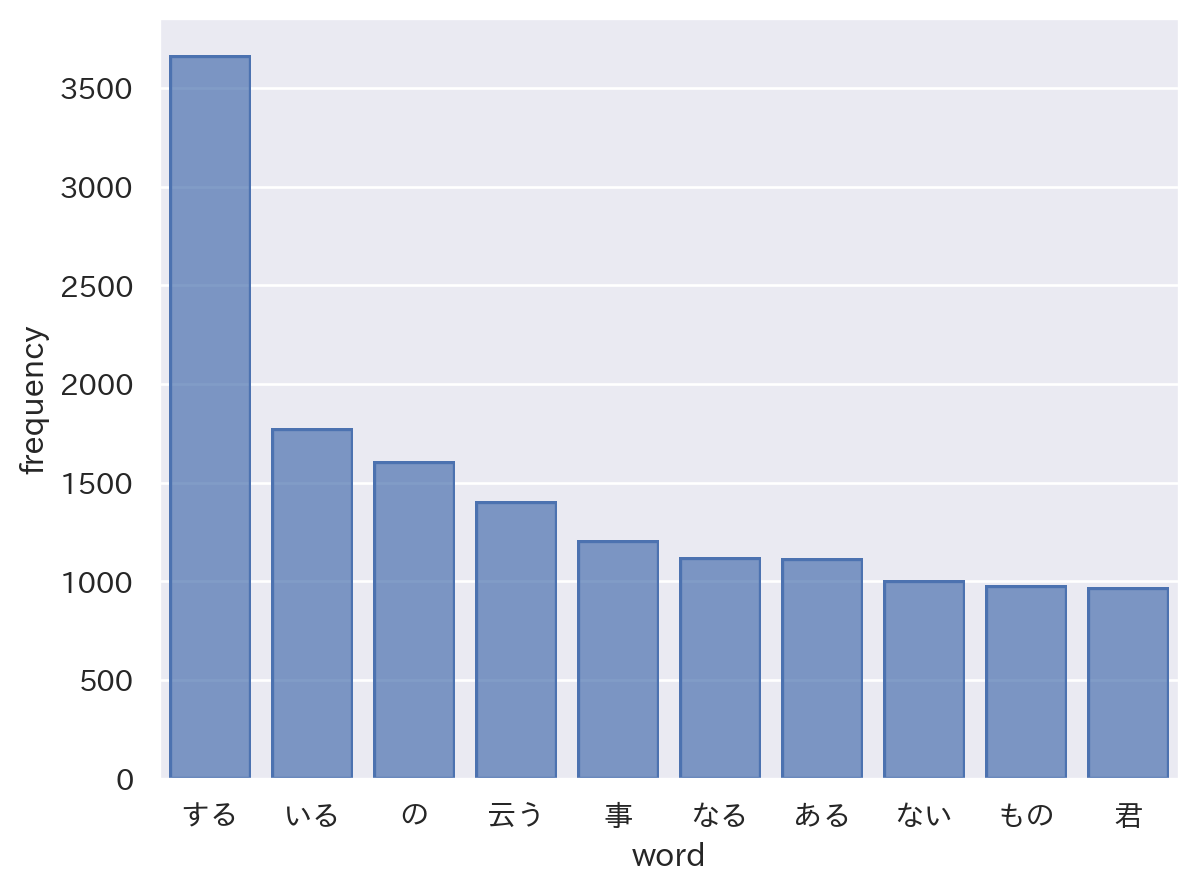

In [54]:
# 36. 頻度上位10語
# (参考)https://qiita.com/take_me/items/7d1a8823b99951210efa
! pip install matplotlib & pip install seaborn & pip install matplotlib_fontja

import seaborn as sns
import pandas as pd
import seaborn.objects as so
import matplotlib_fontja

df = data=pd.DataFrame(counter.most_common(10),columns=['word','frequency'])
so.Plot(df,x='word',y='frequency').add(so.Bar()).theme({'font.family': 'IPAexGothic'})


Counter({'する': 147, '吾輩': 61, '事': 61, 'ある': 60, 'いる': 59, 'の': 56, '人間': 40, 'ない': 39, 'この': 39, 'もの': 39, '云う': 39, '見る': 36, 'よう': 35, 'なる': 34, '猫': 29, 'れる': 27, '思う': 26, '主人': 24, '一': 22, 'その': 22, '人': 19, 'いう': 18, '御': 18, '出来る': 17, '二': 17, 'そう': 16, '君': 15, 'やる': 15, '上': 14, '何': 13, 'ところ': 13, 'しかし': 12, 'これ': 11, '顔': 11, '家': 10, '三': 10, '先生': 10, '下女': 9, '来る': 9, '声': 9, '等': 9, 'いい': 9, '中': 9, '自分': 9, '行く': 9, 'それ': 9, '心': 9, 'こんな': 8, '方': 8, '考える': 8, '知る': 8, '者': 8, '得る': 8, '知れる': 8, 'さ': 8, '鼠': 8, '出す': 7, 'よい': 7, '黒': 7, '聞く': 7, 'うち': 7, '教師': 7, '分る': 7, '到底': 7, 'おく': 7, '十': 7, 'かく': 7, 'られる': 7, 'そんな': 7, 'ん': 7, '食う': 7, 'こう': 7, '訳': 7, '生れる': 7, 'ため': 7, '寝る': 6, '的': 6, '有す': 6, '見える': 6, '彼': 6, 'まだ': 6, 'ちょっと': 6, '吾': 6, '至る': 6, 'あの': 6, 'とる': 6, '彼等': 6, '以上': 6, '度': 5, '気': 5, '決して': 5, 'おる': 5, 'もっとも': 5, '大': 5, 'あ': 5, '車屋': 5, 'どこ': 5, '鼻': 5, '癖': 5, '日本': 5, '読む': 5, '日': 5, '年': 5, '寒月': 5, '一般': 5, 'また': 5, '毛': 5, '共': 5, '入れる

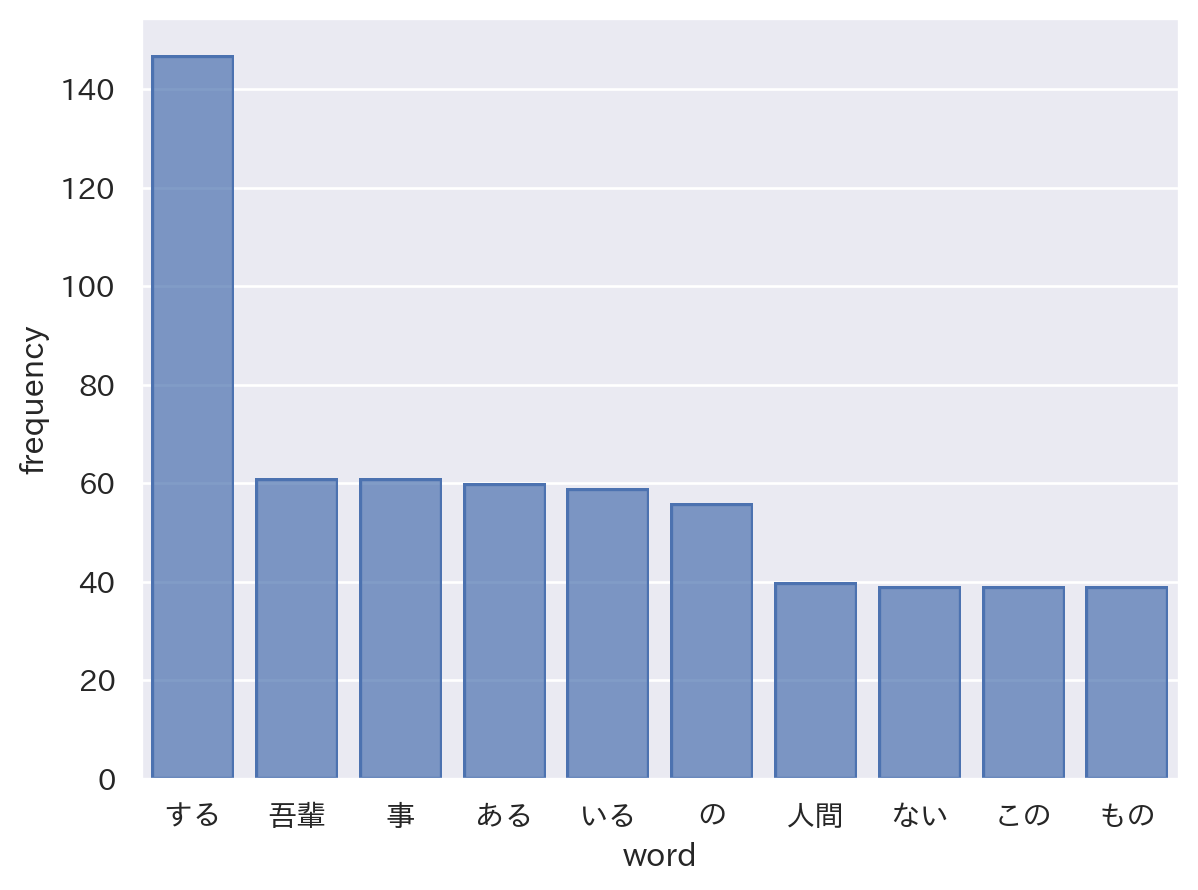

In [16]:
# 37. 「猫」と共起頻度の高い上位10語
import seaborn as sns
import pandas as pd
import seaborn.objects as so
import matplotlib_fontja
import collections
neko_common = []
words = []
for txt in result_map:
    if txt['pos'] not in ('助詞','助動詞','記号') and txt['base'] != '*':
        words.append(txt['base'])
    if txt['surface'] == '。' and '猫' in words:
        words.remove('猫')
        neko_common.extend(words)
        words = []
    elif txt['surface'] == '。':
        words = []
neko_counter = collections.Counter(neko_common)
print(neko_counter)
df = data=pd.DataFrame(neko_counter.most_common(10),columns=['word','frequency'])
so.Plot(df,x='word',y='frequency').add(so.Bar()).theme({'font.family': 'IPAexGothic'})

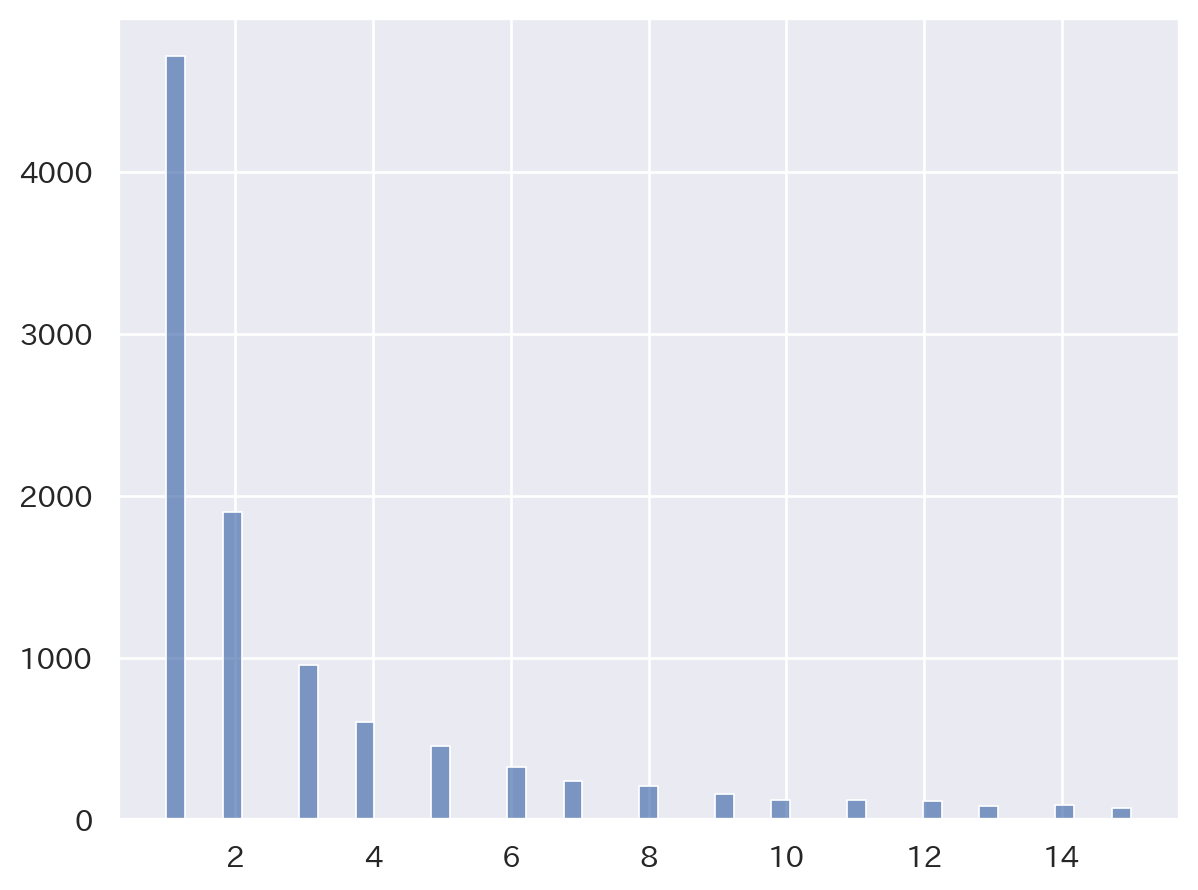

In [105]:
# 38. ヒストグラム
import seaborn as sns
import seaborn.objects as so
import matplotlib_fontja
# ヒストグラムのため、横軸はcounter.values()の値
# 縦軸はその出現頻度（回数）
so.Plot(counter.values()).add(so.Bars(),so.Hist(binrange=(1,15))).theme({'font.family': 'IPAexGothic'})


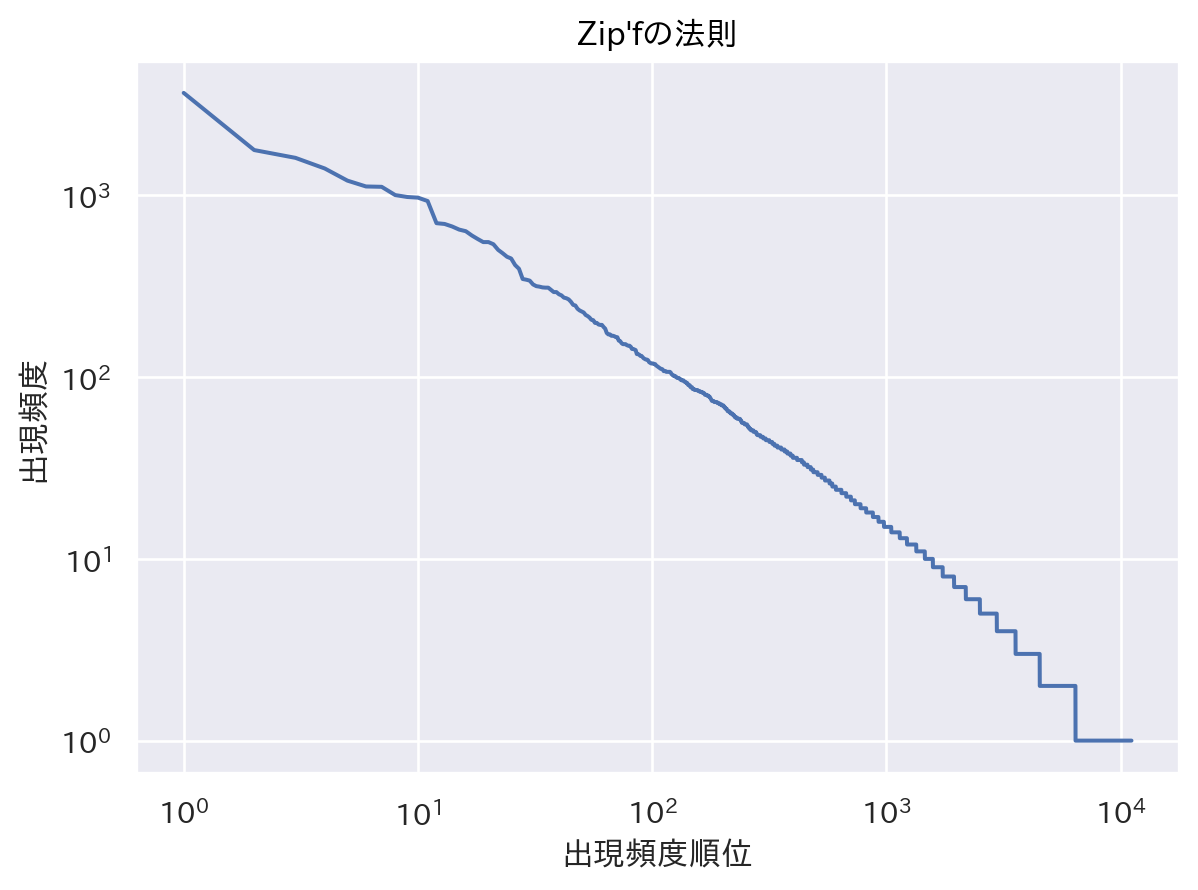

In [111]:
# 39. Zipfの法則
# (参考)https://qiita.com/nkay/items/ab5beea96e8648aeab63
import seaborn as sns
import pandas as pd
import seaborn.objects as so
import matplotlib_fontja
zipf = sorted(counter.values(),reverse=True)
so.Plot(x=[i+1 for i in range(len(zipf))],y=zipf).add(so.Path()).theme({'font.family': 'IPAexGothic'}).scale(x='log',y='log').label(title='Zip\'fの法則',x='出現頻度順位',y='出現頻度')

